In [ ]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
dados = pd.read_csv('https://raw.githubusercontent.com/Orlandi-a11/datasets/main/Online_Learning_Data.csv')

dados.head(15)

,Month,Argentina,Brazil,Colombia,France,Germany,India,Indonesia,Iran,Italy,...,Peru,Philippines,Poland,Russia,South Africa,Spain,Turkey,Ukraine,United Kingdom,United States of America
0,2004-01,0,0,0,0,35,44,0,0,0,...,0,0,0,100,0,53,73,0,69,75
1,2004-02,100,0,0,43,38,59,41,0,0,...,100,31,0,0,82,0,72,0,50,56
2,2004-03,0,90,0,0,48,74,0,0,0,...,0,0,0,0,100,0,0,0,81,50
3,2004-04,0,0,0,0,39,72,39,0,56,...,0,0,0,85,0,0,57,0,38,74
4,2004-05,0,0,0,0,34,24,100,0,0,...,0,66,100,0,0,87,0,0,37,46
5,2004-06,0,0,0,63,67,33,0,0,49,...,0,0,0,0,69,0,100,0,73,71
6,2004-07,0,0,0,0,69,32,0,0,0,...,0,0,0,0,0,0,0,0,81,61
7,2004-08,0,0,0,0,100,70,0,0,59,...,0,0,100,0,58,55,42,0,56,79
8,2004-09,0,0,0,29,0,60,30,0,0,...,0,44,0,0,58,0,0,0,66,77
9,2004-10,0,0,0,0,32,11,0,0,0,...,0,25,0,0,0,41,0,0,46,45


In [ ]:
dados = dados[['Month', 'Germany']]
air_quality = dados.dropna()
air_quality.head()

,Month,Germany
0,2004-01,35
1,2004-02,38
2,2004-03,48
3,2004-04,39
4,2004-05,34


In [ ]:
# Fazendo o indice mensal
dados['Month'] = pd.to_datetime(dados['Month'], format='%Y.%m.%d')
dados = dados.set_index('Month')
dados = dados.sort_index()
dados.head(100)

,Germany
Month,
2004-01-01,35
2004-02-01,38
2004-03-01,48
2004-04-01,39
2004-05-01,34
...,...
2011-12-01,24
2012-01-01,33
2012-02-01,30


Train dates : 2004-01-01 00:00:00 --- 2018-01-01 00:00:00  (n=169)
Test dates  : 2018-02-01 00:00:00 --- 2021-10-01 00:00:00  (n=45)


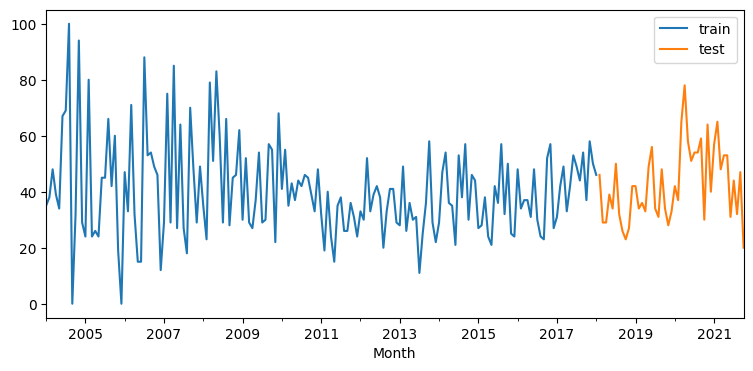

In [ ]:
# Divide dados em treinamento e teste
# Para séries temporais, sempre utilizamos os dados mais recentes para teste
import matplotlib.pyplot as plt
steps = 45
data_train = dados[:-steps]
data_test  = dados[-steps:]

print(f"Train dates : {data_train.index.min()} --- {data_train.index.max()}  (n={len(data_train)})")
print(f"Test dates  : {data_test.index.min()} --- {data_test.index.max()}  (n={len(data_test)})")

# Plotando os dados
fig, ax=plt.subplots(figsize=(9, 4))
data_train['Germany'].plot(ax=ax, label='train')
data_test['Germany'].plot(ax=ax, label='test')
ax.legend();

In [ ]:
pip install pmdarima

In [ ]:

# Suponha que 'data_train' seja o seu DataFrame de dados de treinamento
from pmdarima import auto_arima
import numpy as np

# Ajuste automaticamente o modelo ARIMA aos dados de treinamento com hiperparâmetros personalizados
model = auto_arima(data_train['Germany'], seasonal=True, stepwise=False, trace=True, error_action='ignore', suppress_warnings=True, D=1, max_P=2,  m=12)  # Período sazonal (ajuste de acordo com a periodicidade dos dados)
steps = 45

predictions = model.predict(n_periods=steps)
model.fit(data_train['Germany'])
# Gere previsões
forecast = model.predict(n_periods=len(data_test))
# Converte para um dataframe
forecast = pd.DataFrame(forecast,index = data_test.index,columns=['Prediction'])
forecast

 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1440.674, Time=0.04 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=inf, Time=0.57 sec
 ARIMA(0,0,0)(0,1,2)[12] intercept   : AIC=inf, Time=4.27 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=1392.244, Time=0.39 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=1.47 sec
 ARIMA(0,0,0)(1,1,2)[12] intercept   : AIC=inf, Time=5.09 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=1389.809, Time=2.03 sec
 ARIMA(0,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=7.02 sec
 ARIMA(0,0,0)(2,1,2)[12] intercept   : AIC=inf, Time=4.26 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=1435.905, Time=0.13 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.94 sec
 ARIMA(0,0,1)(0,1,2)[12] intercept   : AIC=inf, Time=2.60 sec
 ARIMA(0,0,1)(1,1,0)[12] intercept   : AIC=1392.905, Time=0.44 sec
 ARIMA(0,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=1.86 sec
 ARIMA(0,0,1)(1,1,2)[12] intercept   : AIC=inf, Time=5.61 sec
 ARIMA(0,0,1)(2,1,0)[12] intercept   : AIC=13

,Prediction
Month,
2018-02-01,35.176603
2018-03-01,40.843481
2018-04-01,32.790579
2018-05-01,32.449251
2018-06-01,48.156923
2018-07-01,37.156523
2018-08-01,36.538879
2018-09-01,34.795515
2018-10-01,46.106091


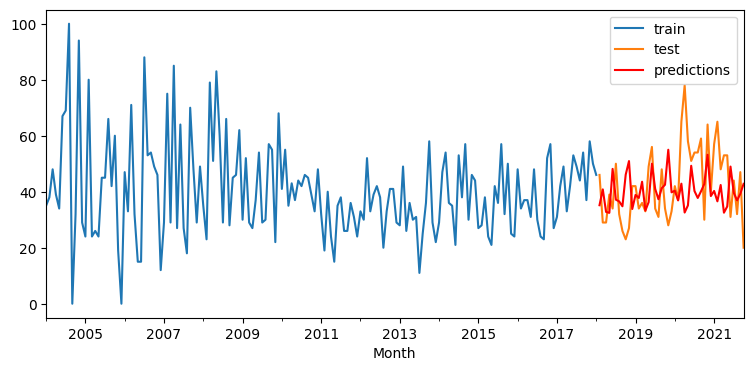

In [ ]:
# Plota a predição, comparando com valores reais
fig, ax=plt.subplots(figsize=(9, 4))
data_train['Germany'].plot(ax=ax, label='train')
data_test['Germany'].plot(ax=ax, label='test')
forecast['Prediction'].plot(ax=ax, label='predictions', color='red')
ax.legend();